# Causal impact and Bayesian structural time series
![](https://i.ytimg.com/vi/y3hLJnB6O7c/maxresdefault.jpg)

In [27]:
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(xts)
library(CausalImpact)

In [28]:
# csvをロード
sales <- read_csv("sales data-set.csv")
sales

Parsed with column specification:
cols(
  Store = col_double(),
  Dept = col_double(),
  Date = col_character(),
  Weekly_Sales = col_double(),
  IsHoliday = col_logical()
)



Store,Dept,Date,Weekly_Sales,IsHoliday
<dbl>,<dbl>,<chr>,<dbl>,<lgl>
1,1,05/02/2010,24924.50,FALSE
1,1,12/02/2010,46039.49,TRUE
1,1,19/02/2010,41595.55,FALSE
1,1,26/02/2010,19403.54,FALSE
1,1,05/03/2010,21827.90,FALSE
1,1,12/03/2010,21043.39,FALSE
1,1,19/03/2010,22136.64,FALSE
1,1,26/03/2010,26229.21,FALSE
1,1,02/04/2010,57258.43,FALSE


In [41]:
features <- read_csv("Features data set.csv")
features

Parsed with column specification:
cols(
  Store = col_double(),
  Date = col_character(),
  Temperature = col_double(),
  Fuel_Price = col_double(),
  MarkDown1 = col_double(),
  MarkDown2 = col_double(),
  MarkDown3 = col_double(),
  MarkDown4 = col_double(),
  MarkDown5 = col_double(),
  CPI = col_double(),
  Unemployment = col_double(),
  IsHoliday = col_logical()
)



Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,05/02/2010,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE
1,12/02/2010,38.51,2.548,NA,NA,NA,NA,NA,211.2422,8.106,TRUE
1,19/02/2010,39.93,2.514,NA,NA,NA,NA,NA,211.2891,8.106,FALSE
1,26/02/2010,46.63,2.561,NA,NA,NA,NA,NA,211.3196,8.106,FALSE
1,05/03/2010,46.50,2.625,NA,NA,NA,NA,NA,211.3501,8.106,FALSE
1,12/03/2010,57.79,2.667,NA,NA,NA,NA,NA,211.3806,8.106,FALSE
1,19/03/2010,54.58,2.720,NA,NA,NA,NA,NA,211.2156,8.106,FALSE
1,26/03/2010,51.45,2.732,NA,NA,NA,NA,NA,211.0180,8.106,FALSE
1,02/04/2010,62.27,2.719,NA,NA,NA,NA,NA,210.8204,7.808,FALSE


In [43]:
stores <- read_csv("stores data-set.csv")
head(stores)

Parsed with column specification:
cols(
  Store = col_double(),
  Type = col_character(),
  Size = col_double()
)



Store,Type,Size
<dbl>,<chr>,<dbl>
1,A,151315
2,A,202307
3,B,37392
4,A,205863
5,B,34875
6,A,202505


In [29]:
# リスト形式でデータを表示する
glimpse(sales)

Observations: 421,570
Variables: 5
$ Store        <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Dept         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Date         <chr> "05/02/2010", "12/02/2010", "19/02/2010", "26/02/2010", …
$ Weekly_Sales <dbl> 24924.50, 46039.49, 41595.55, 19403.54, 21827.90, 21043.…
$ IsHoliday    <lgl> FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…


In [30]:
# データ型の変換, factor型のベクトルを作る
sales <- sales %>% mutate(Store = as.factor(Store),
                         Dept = as.factor(Dept),
                         Date = as.Date(Date, "%d/%m/%Y"))

glimpse(sales)

Observations: 421,570
Variables: 5
$ Store        <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Dept         <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Date         <date> 2010-02-05, 2010-02-12, 2010-02-19, 2010-02-26, 2010-03…
$ Weekly_Sales <dbl> 24924.50, 46039.49, 41595.55, 19403.54, 21827.90, 21043.…
$ IsHoliday    <lgl> FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…


In [31]:
levels(sales$Store)
levels(sales$Dept)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "16"
[16] "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30" "31"
[31] "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45" "46"
[46] "47" "48" "49" "50" "51" "52" "54" "55" "56" "58" "59" "60" "65" "67" "71"
[61] "72" "74" "77" "78" "79" "80" "81" "82" "83" "85" "87" "90" "91" "92" "93"
[76] "94" "95" "96" "97" "98" "99"

In [32]:
# 行とフィルターによるデータの条件選択
sales <- sales %>% filter(Store == 1,
                         Dept == 1 | Dept == 2 | Dept == 3 | Dept == 4) %>% dplyr::select(-IsHoliday)
glimpse(sales)

Observations: 572
Variables: 4
$ Store        <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Dept         <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Date         <date> 2010-02-05, 2010-02-12, 2010-02-19, 2010-02-26, 2010-03…
$ Weekly_Sales <dbl> 24924.50, 46039.49, 41595.55, 19403.54, 21827.90, 21043.…


In [36]:
quartzFonts(sans=quartzFont(c("Helvetica","HiraKakuProN-W3","HiraKakuProN-W6","HiraMaruProN-W4")))
quartzFonts()

$serif
[1] "Times-Roman"      "Times-Bold"       "Times-Italic"     "Times-BoldItalic"

$sans
[1] "Helvetica"       "HiraKakuProN-W3" "HiraKakuProN-W6" "HiraMaruProN-W4"

$mono
[1] "Courier"             "Courier-Bold"        "Courier-Oblique"    
[4] "Courier-BoldOblique"

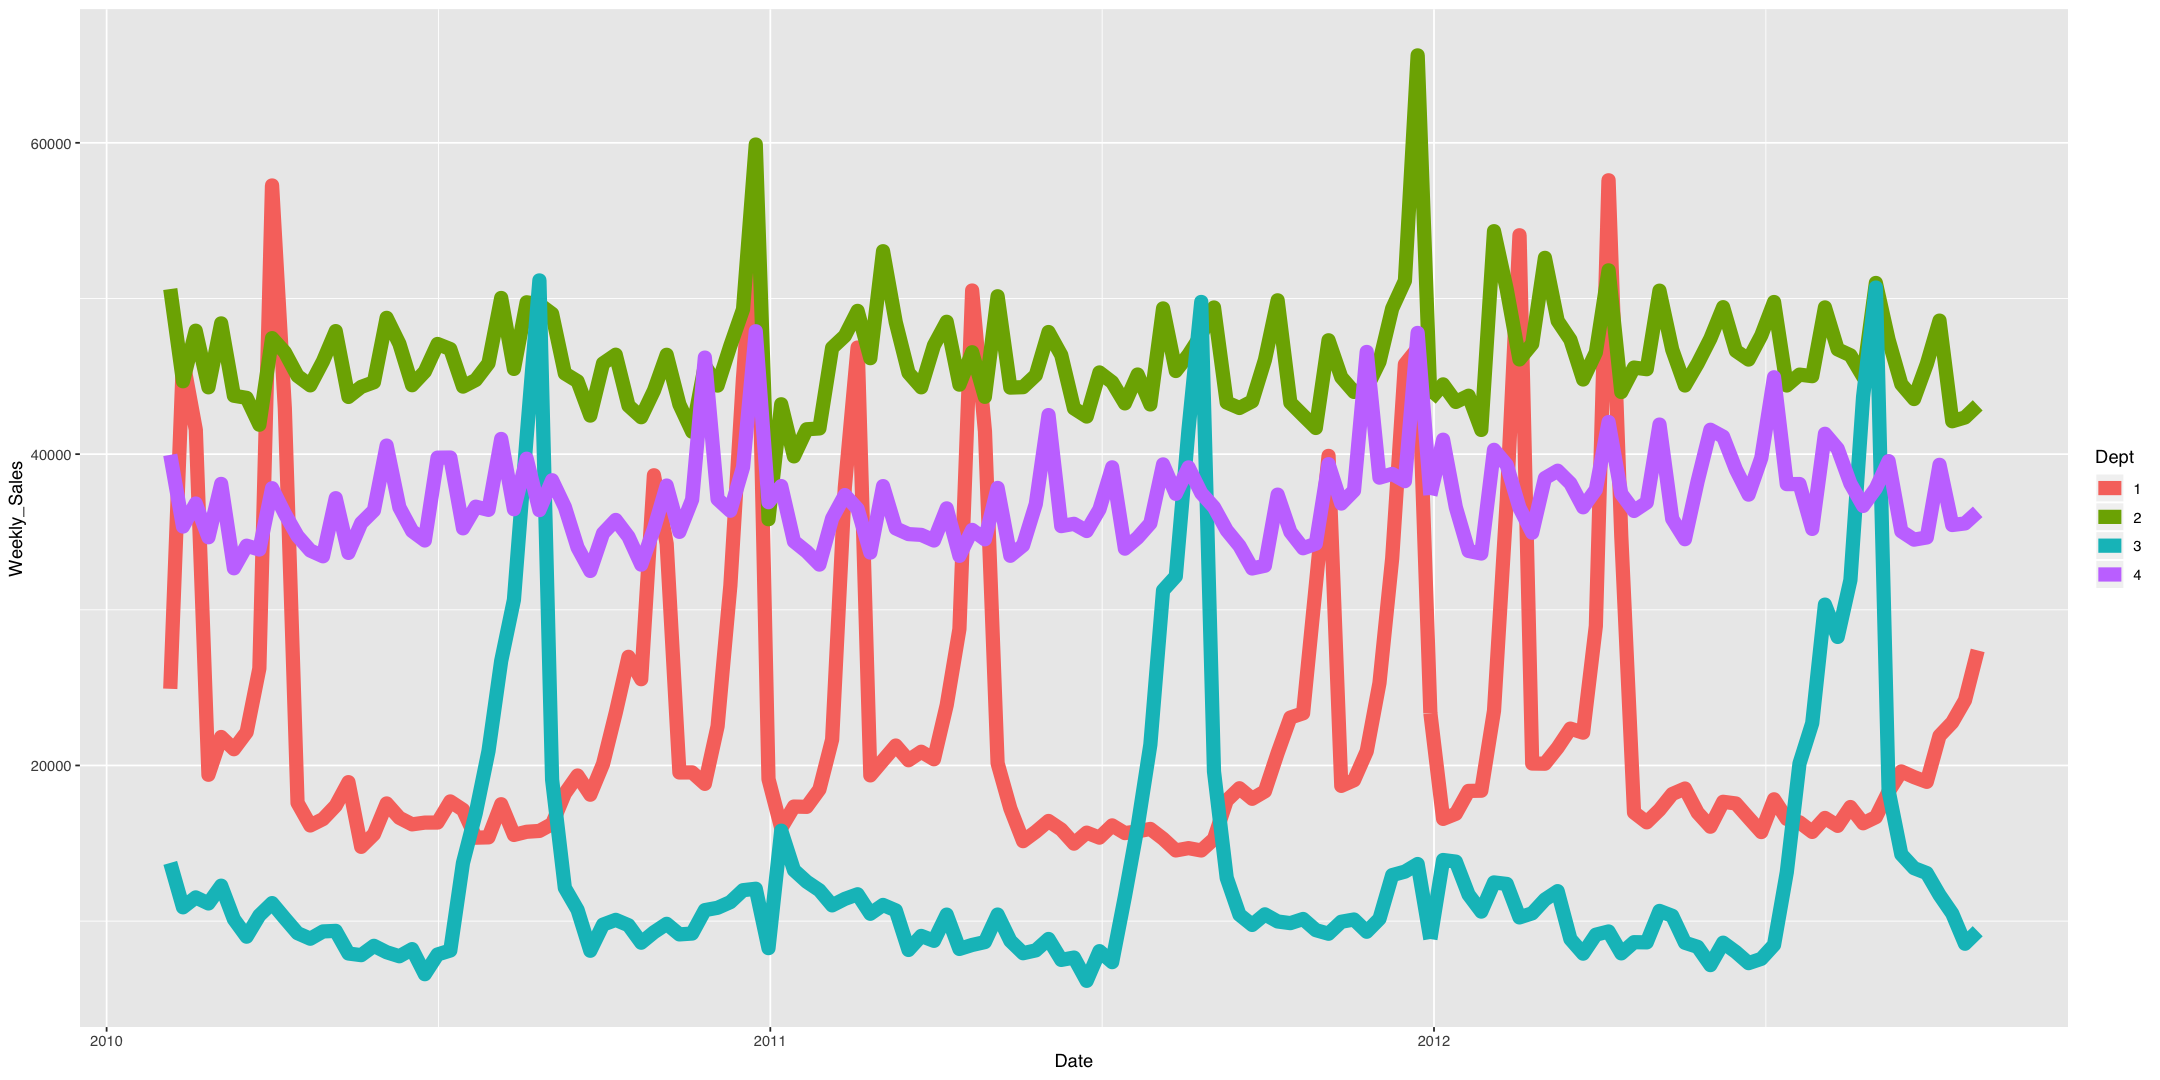

In [40]:
# plot
options(repr.plot.width=18, repr.plot.height=9)
ggplot(sales, aes(x = Date, y = Weekly_Sales, colour = Dept), family="Helvetica") +
  geom_line(size=4) + theme(text=element_text(family="Helvetica"))

## #01. 2012年3月の間を, 人工的にTVCMキャンペーン期間とする

In [47]:
# マーケティングキャンペーンのデータを挿入
sales_marketing <- 
    sales %>%
    filter(Date > "2010-06-01",
          Date < "2012-06-01") %>%
    mutate(campaign = ifelse(Dept == 4 & Date > "2012-02-28" & Date < "2012-04-01",
          TRUE,
          FALSE))

In [49]:
tail(sales_marketing)

Store,Dept,Date,Weekly_Sales,campaign
<fct>,<fct>,<date>,<dbl>,<lgl>
1,4,2012-04-20,36350.03,FALSE
1,4,2012-04-27,36894.54,FALSE
1,4,2012-05-04,41897.55,FALSE
1,4,2012-05-11,35840.06,FALSE
1,4,2012-05-18,34536.29,FALSE
1,4,2012-05-25,38270.34,FALSE


In [50]:
sales_marketing %>%
    filter(Date > "2012-02-01" & Date < "2012-05-01",
          Dept == 1 | Dept == 4)

Store,Dept,Date,Weekly_Sales,campaign
<fct>,<fct>,<date>,<dbl>,<lgl>
1,1,2012-02-03,23510.49,FALSE
1,1,2012-02-10,36988.49,FALSE
1,1,2012-02-17,54060.10,FALSE
1,1,2012-02-24,20124.22,FALSE
1,1,2012-03-02,20113.03,FALSE
1,1,2012-03-09,21140.07,FALSE
1,1,2012-03-16,22366.88,FALSE
1,1,2012-03-23,22107.70,FALSE
1,1,2012-03-30,28952.86,FALSE


In [51]:
# 調整をかける, キャンペーン中は売上が1.3倍になる
sales_adjusted <-
    sales_marketing %>%
    mutate(adjusted_sales = ifelse(campaign == TRUE,
                                  Weekly_Sales * 1.3,
                                  Weekly_Sales))

In [52]:
head(sales_adjusted)

Store,Dept,Date,Weekly_Sales,campaign,adjusted_sales
<fct>,<fct>,<date>,<dbl>,<lgl>,<dbl>
1,1,2010-06-04,17558.09,FALSE,17558.09
1,1,2010-06-11,16637.62,FALSE,16637.62
1,1,2010-06-18,16216.27,FALSE,16216.27
1,1,2010-06-25,16328.72,FALSE,16328.72
1,1,2010-07-02,16333.14,FALSE,16333.14
1,1,2010-07-09,17688.76,FALSE,17688.76


### ●2012年3月の間に売上の一時的リフトができたことを確認（下図）

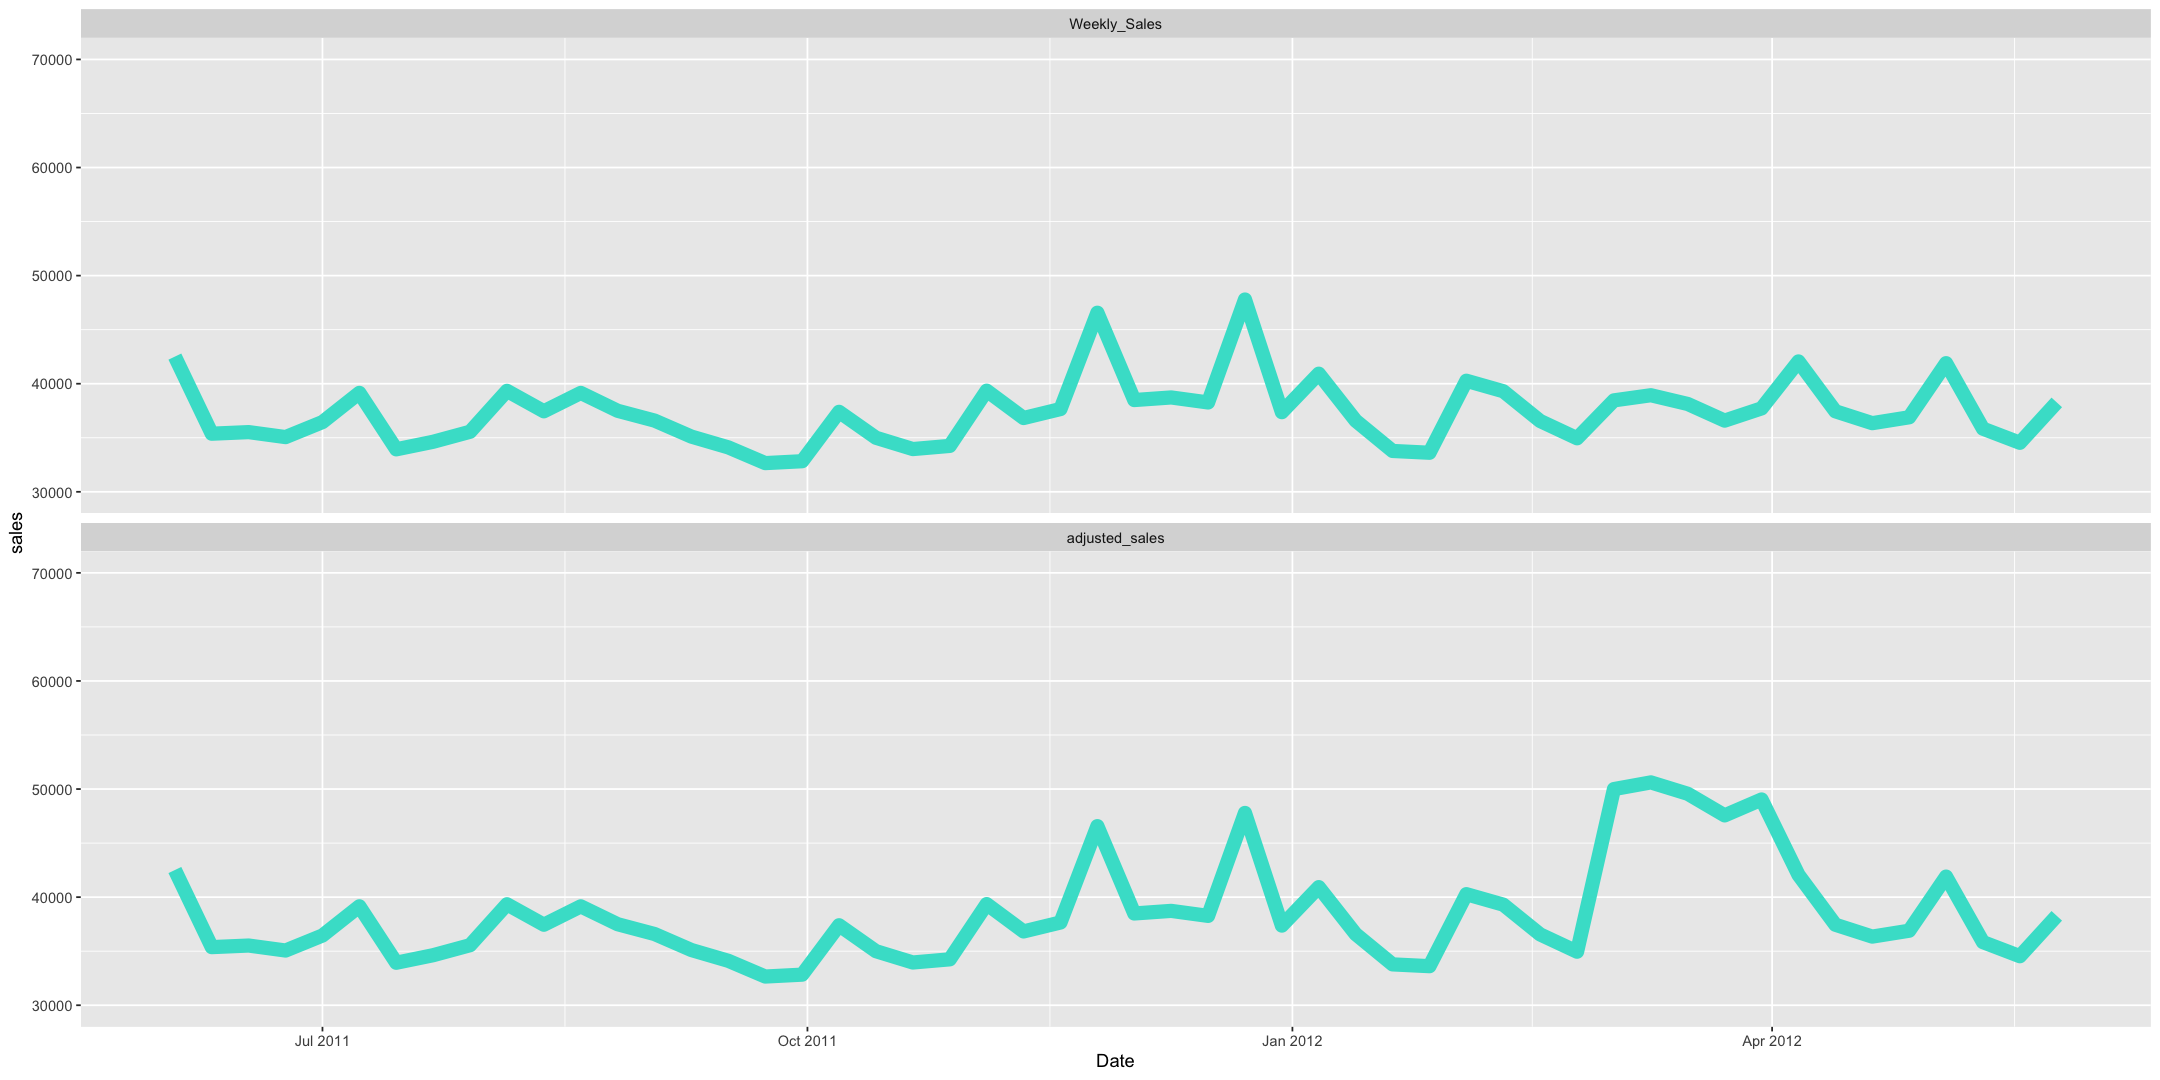

In [62]:
# plot adjusted weekly sales against original data
sales_adjusted %>%
  filter(Dept == 4 & Date > "2011-06-01") %>%
  dplyr::select(Date, Weekly_Sales, adjusted_sales) %>%
  gather(type, sales, -Date) %>%
  ggplot(aes(x = Date, y = sales)) +
  geom_line(size=4, colour="turquoise") +
  ylim(30000, 70000) +
  facet_wrap(~type, ncol = 1)

In [58]:
# create wide dataframe

marketing_cause <-
    sales_adjusted %>%
    dplyr::select(Date, Dept, adjusted_sales) %>%
    spread(Dept, adjusted_sales) %>%
    rename(dept1 = 2, 
         dept2 = 3,
         dept3 = 4,
         dept4 = 5) %>%
    dplyr::select(Date, dept1, dept2, dept3, dept4)

tail(marketing_cause)

Date,dept1,dept2,dept3,dept4
<date>,<dbl>,<dbl>,<dbl>,<dbl>
2012-04-20,16976.19,45561.85,8647.36,36350.03
2012-04-27,16347.60,45456.23,8635.62,36894.54
2012-05-04,17147.44,50501.30,10655.35,41897.55
2012-05-11,18164.20,46717.76,10342.72,35840.06
2012-05-18,18517.79,44411.23,8609.82,34536.29
2012-05-25,16963.55,45817.07,8345.33,38270.34


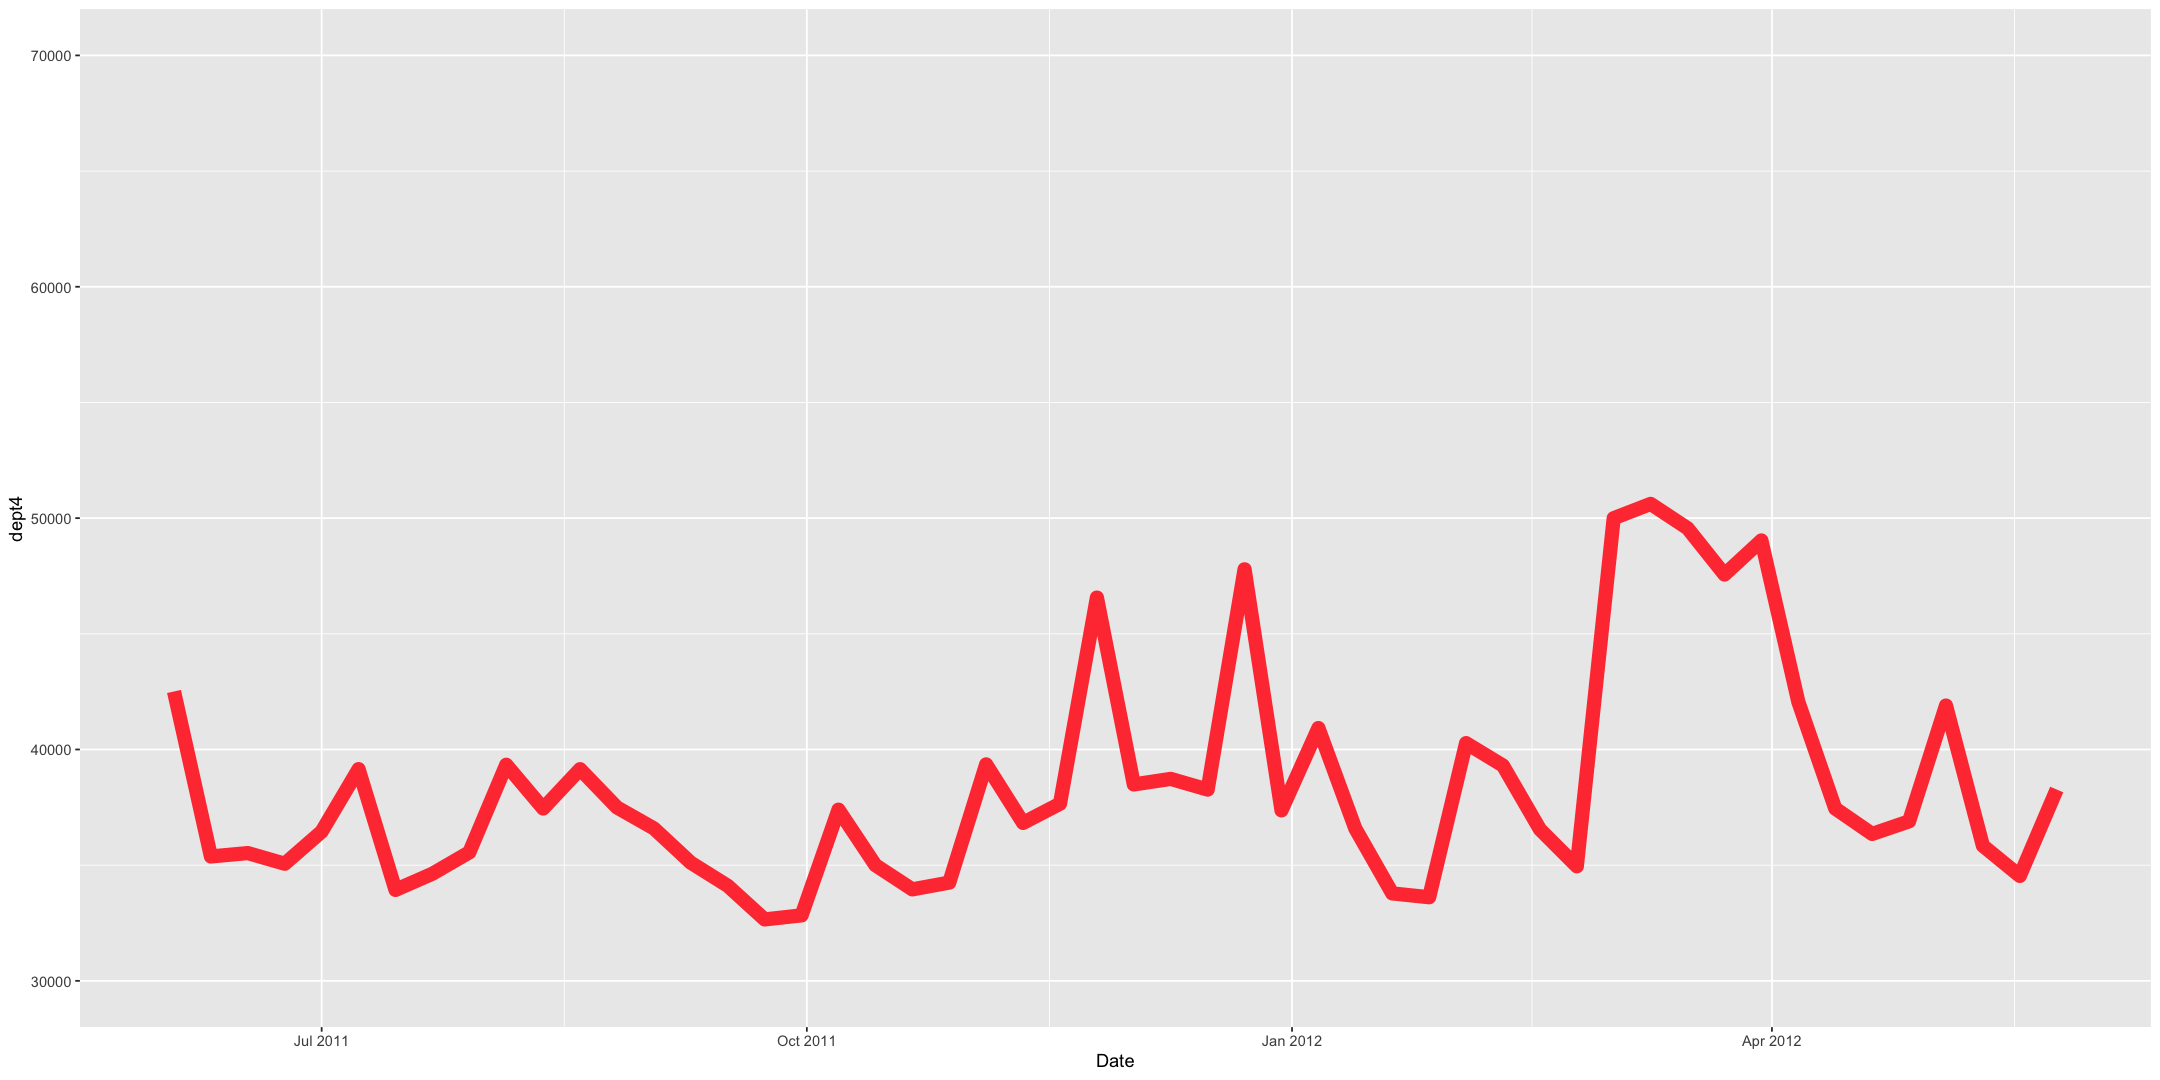

In [61]:
marketing_cause %>%
    filter(Date > "2011-06-01") %>%
    ggplot(aes(x=Date, y=dept4)) +
    geom_line(size=4, colour="brown1") +
    ylim(30000, 70000)

## ■CausalImpactのインプットは時系列データに変換

In [91]:
# 時系列データへの変換が必要

library(xts)

marketing_xts <-
    marketing_cause %>%
    dplyr::select(-Date) %>%
    as.xts(order.by = marketing_cause$Date)

head(marketing_xts)
tail(marketing_xts)

              dept1    dept2   dept3    dept4
2010-06-04 17558.09 48754.47 8001.41 40548.19
2010-06-11 16637.62 47089.54 7742.75 36579.96
2010-06-18 16216.27 44428.71 8201.06 35059.52
2010-06-25 16328.72 45299.92 6591.22 34454.69
2010-07-02 16333.14 47077.72 7857.88 39773.71
2010-07-09 17688.76 46752.12 8112.67 39781.45

              dept1    dept2    dept3    dept4
2012-04-20 16976.19 45561.85  8647.36 36350.03
2012-04-27 16347.60 45456.23  8635.62 36894.54
2012-05-04 17147.44 50501.30 10655.35 41897.55
2012-05-11 18164.20 46717.76 10342.72 35840.06
2012-05-18 18517.79 44411.23  8609.82 34536.29
2012-05-25 16963.55 45817.07  8345.33 38270.34

In [72]:
names(marketing_xts)

[1] "dept1" "dept2" "dept3" "dept4"

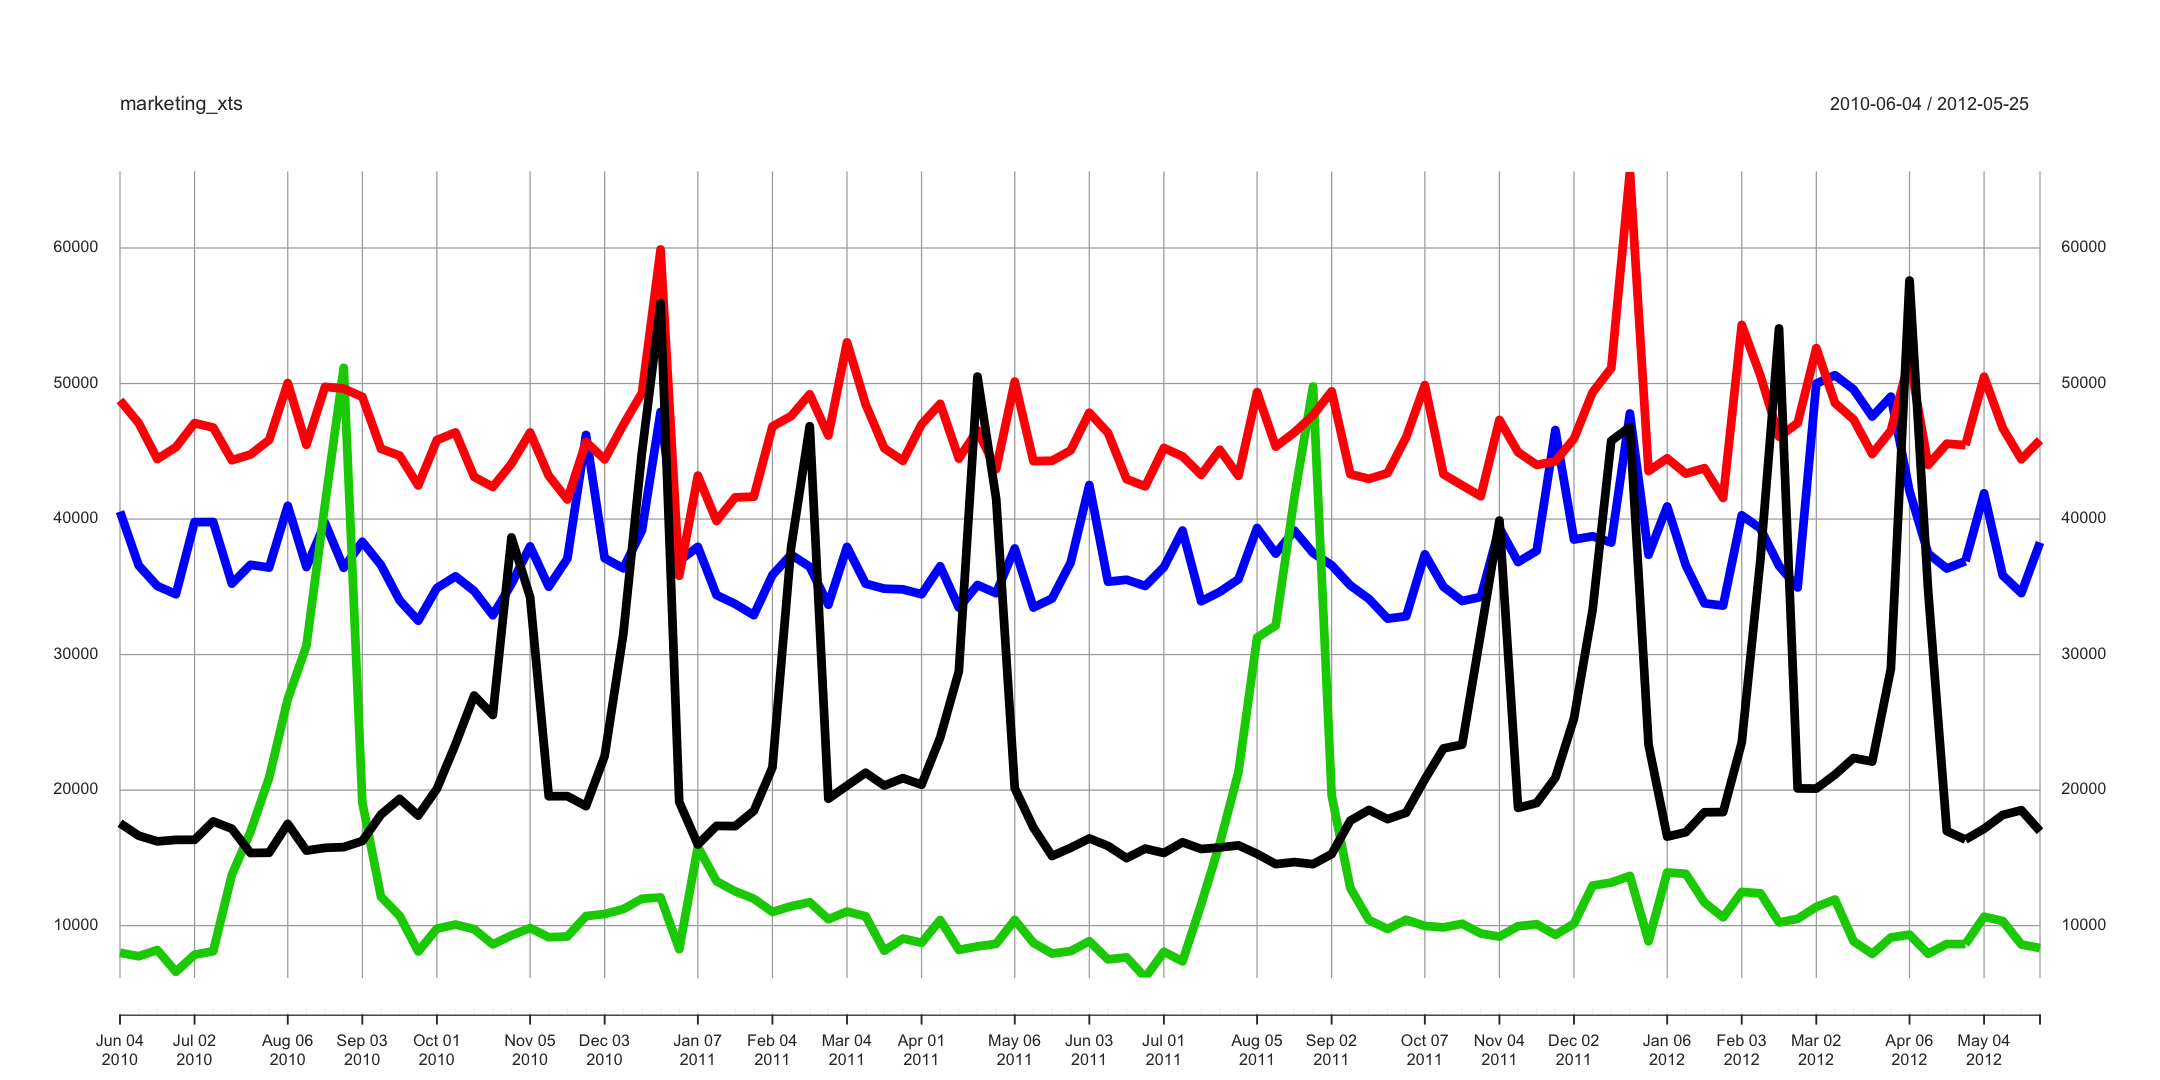

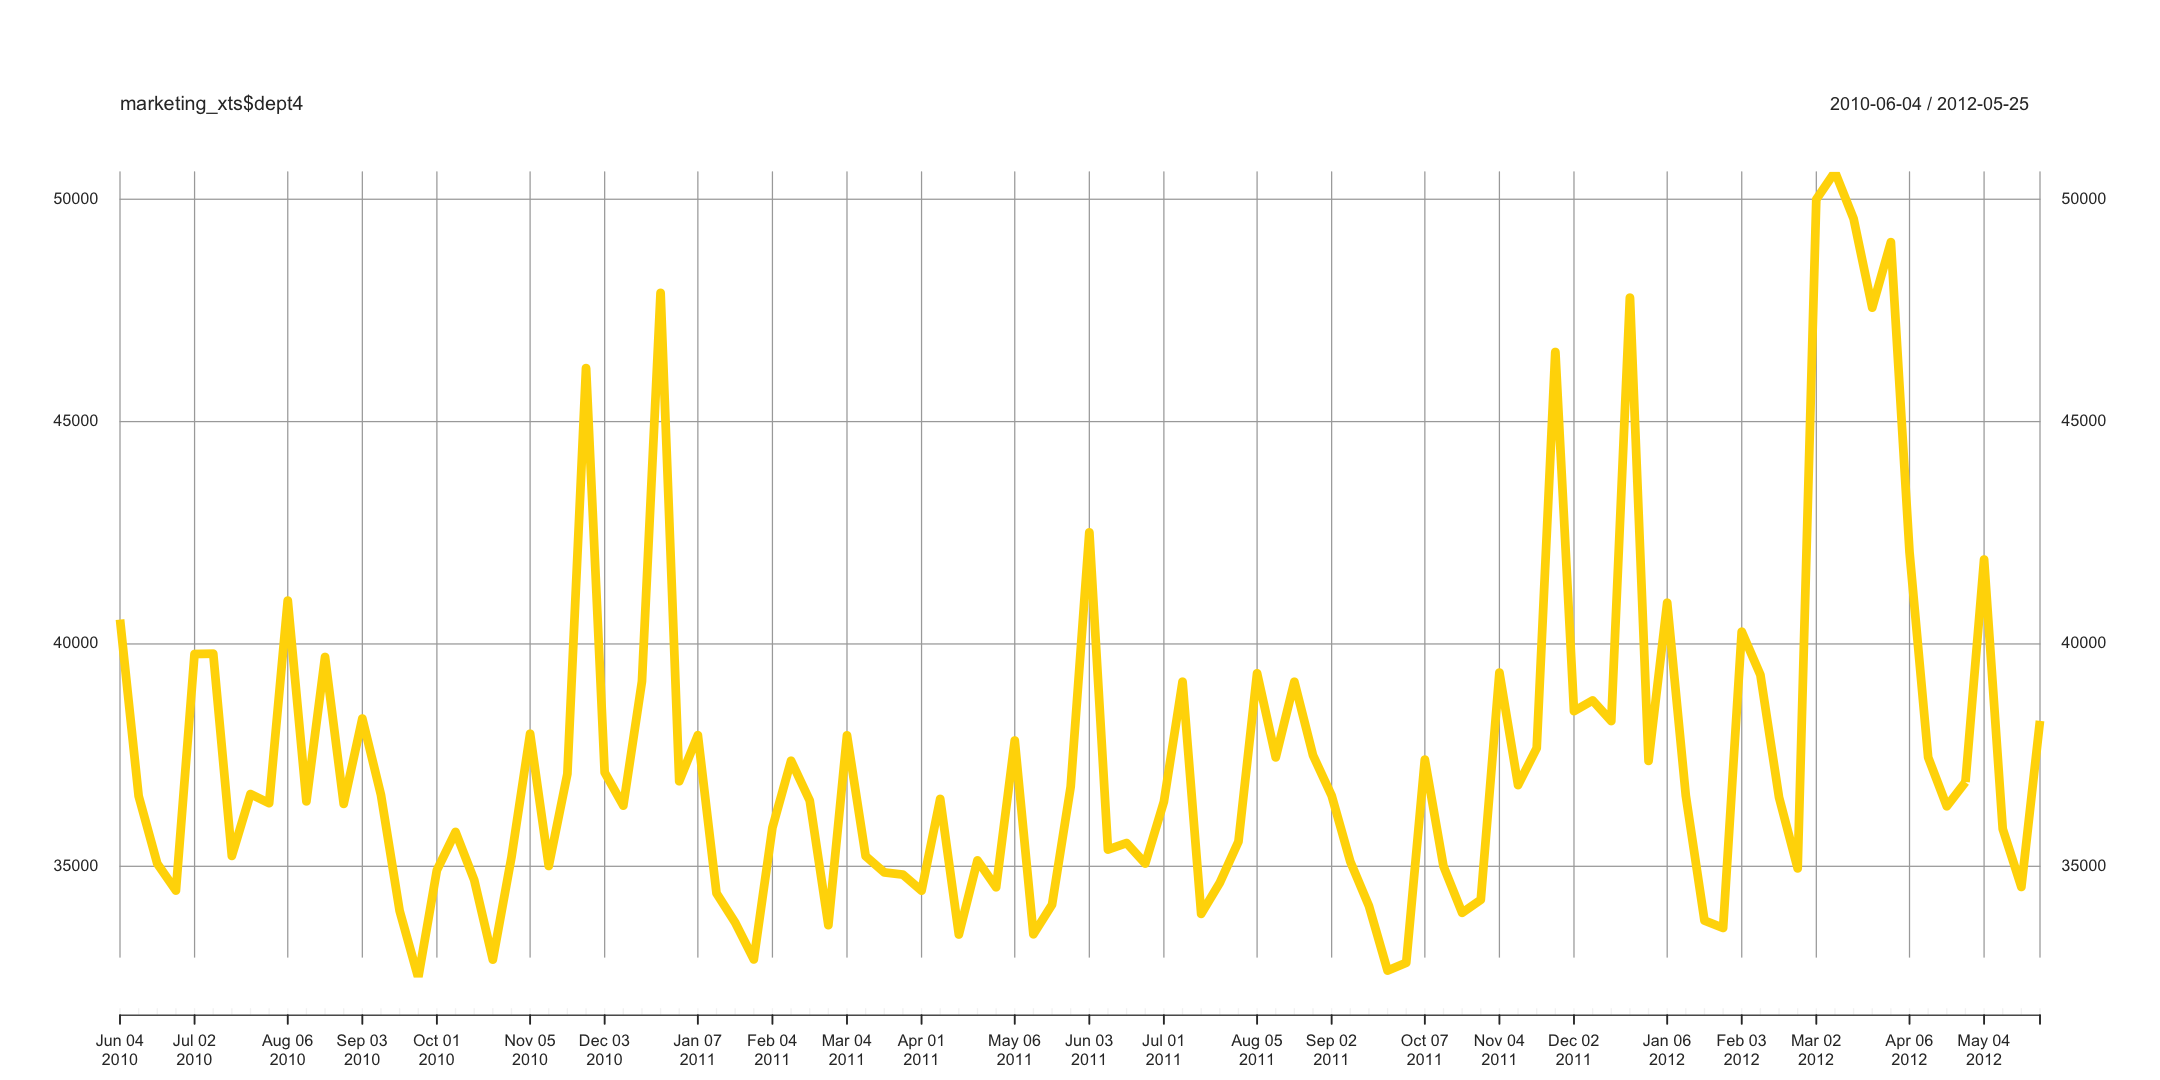

In [76]:
plot(marketing_xts, lwd=7)
plot(marketing_xts$dept4, lwd=7, col=c("gold"))

## #03. Causal推定モデルの作成

In [92]:
# 期間の変数づくり

pre_period <- as.Date(c("2010-06-04", "2012-02-29"))
post_period <- as.Date(c("2012-03-01", "2012-03-31"))

In [94]:
# Causal Impactモデルにデータを入れる
# Bayesian Structural Time Series（ベイズ構造時系列モデル）

impact <- CausalImpact(marketing_xts$dept4,
                      pre.period = pre_period,
                      post.period = post_period) # キャンペーンがなかった時の変数

In [95]:
# 結果
summary(impact)

Posterior inference {CausalImpact}

                         Average          Cumulative     
Actual                   49355            246773         
Prediction (s.d.)        36878 (1465)     184388 (7326)  
95% CI                   [34008, 4e+04]   [170039, 2e+05]
                                                         
Absolute effect (s.d.)   12477 (1465)     62385 (7326)   
95% CI                   [9593, 15347]    [47964, 76734] 
                                                         
Relative effect (s.d.)   34% (4%)         34% (4%)       
95% CI                   [26%, 42%]       [26%, 42%]     

Posterior tail-area probability p:   0.00101
Posterior prob. of a causal effect:  99.8993%

For more details, type: summary(impact, "report")



In [96]:
# レポートの出力
summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 49.35K. By contrast, in the absence of an intervention, we would have expected an average response of 36.88K. The 95% interval of this counterfactual prediction is [34.01K, 39.76K]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 12.48K with a 95% interval of [9.59K, 15.35K]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 246.77K. By contrast, had the intervention not taken place, we would have expected a sum of 184.39K. The 95% interval of this prediction is [170.04K, 198.81K].

The above results are given in terms of absolute numbers. In relative terms, the respons

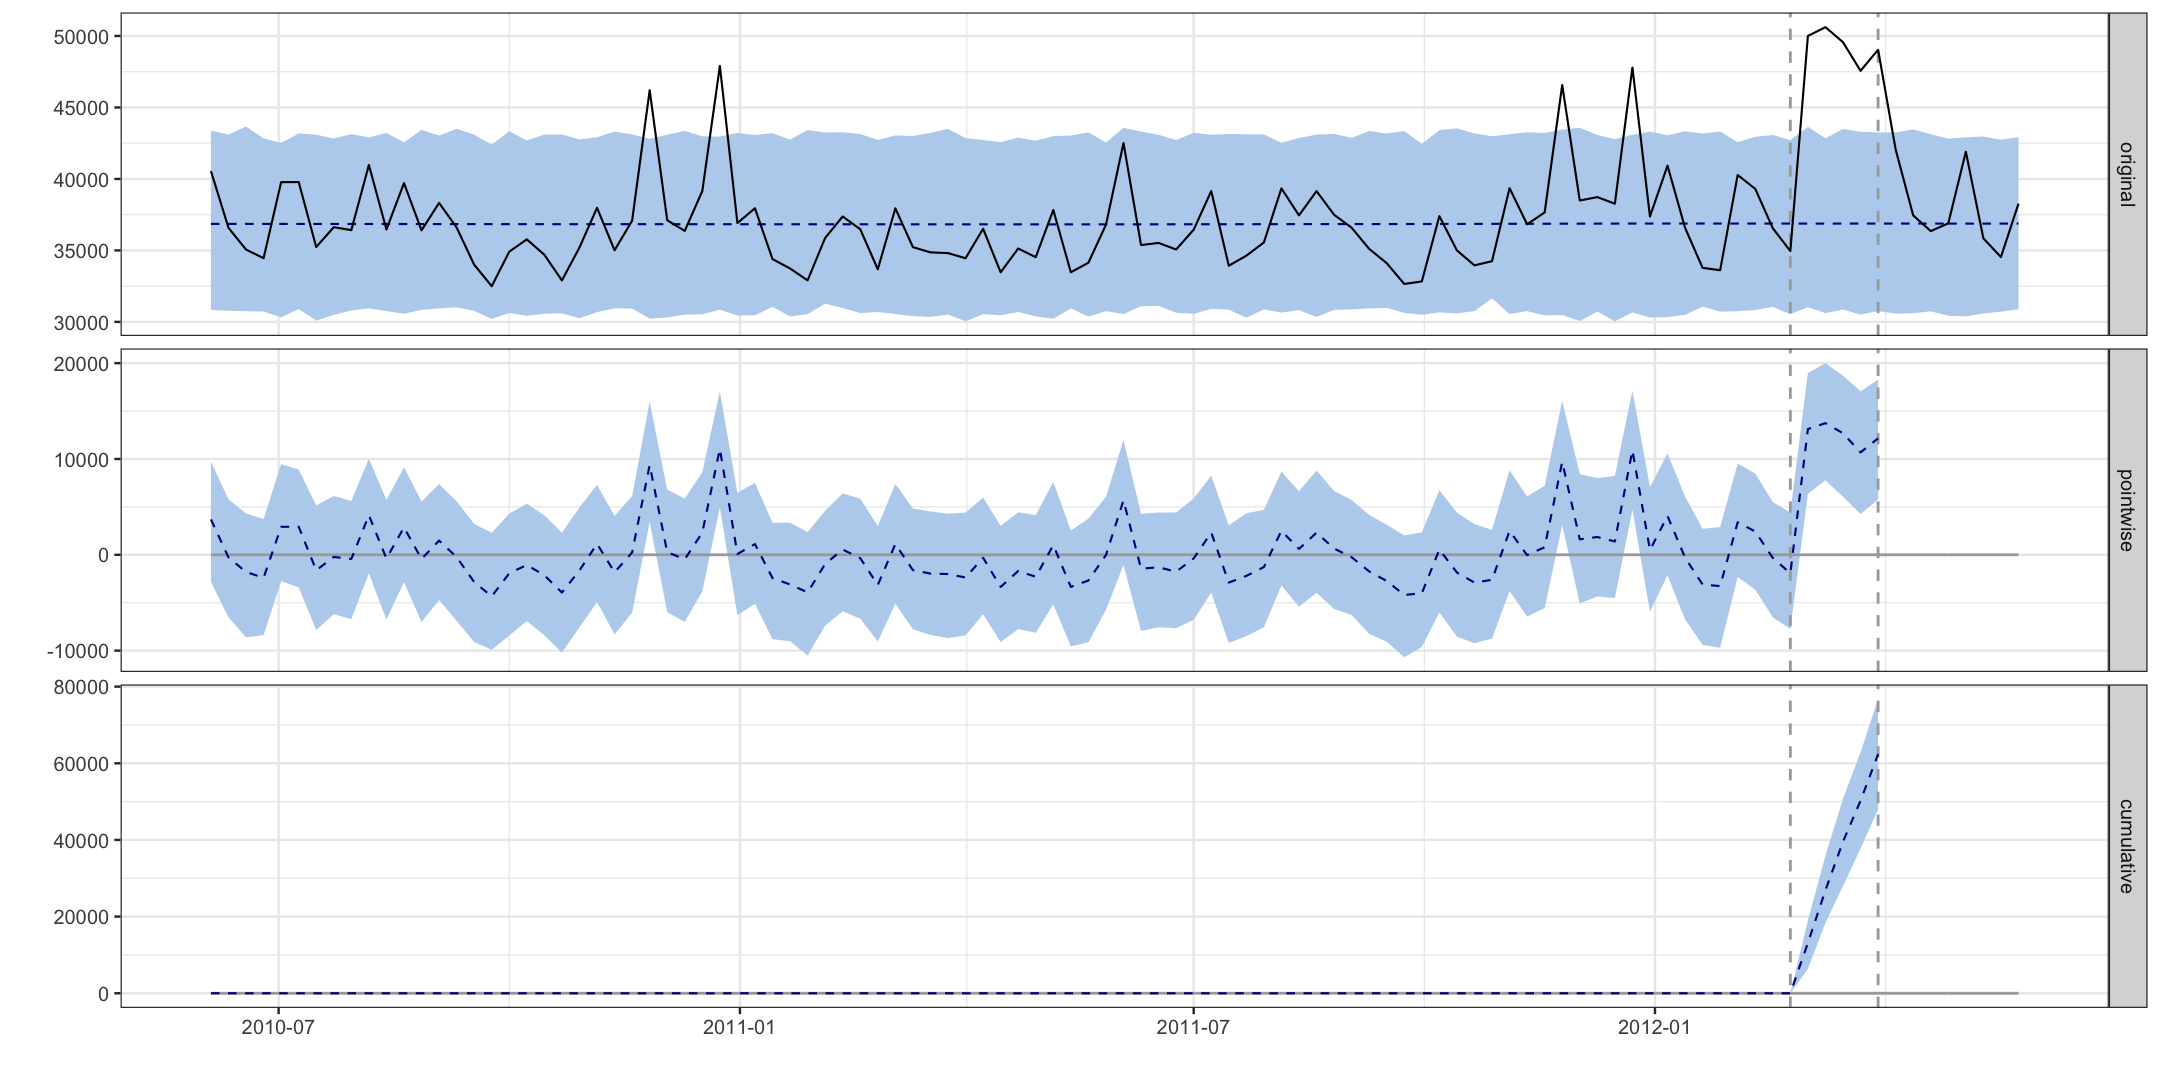

In [97]:
# 可視化
plot(impact)

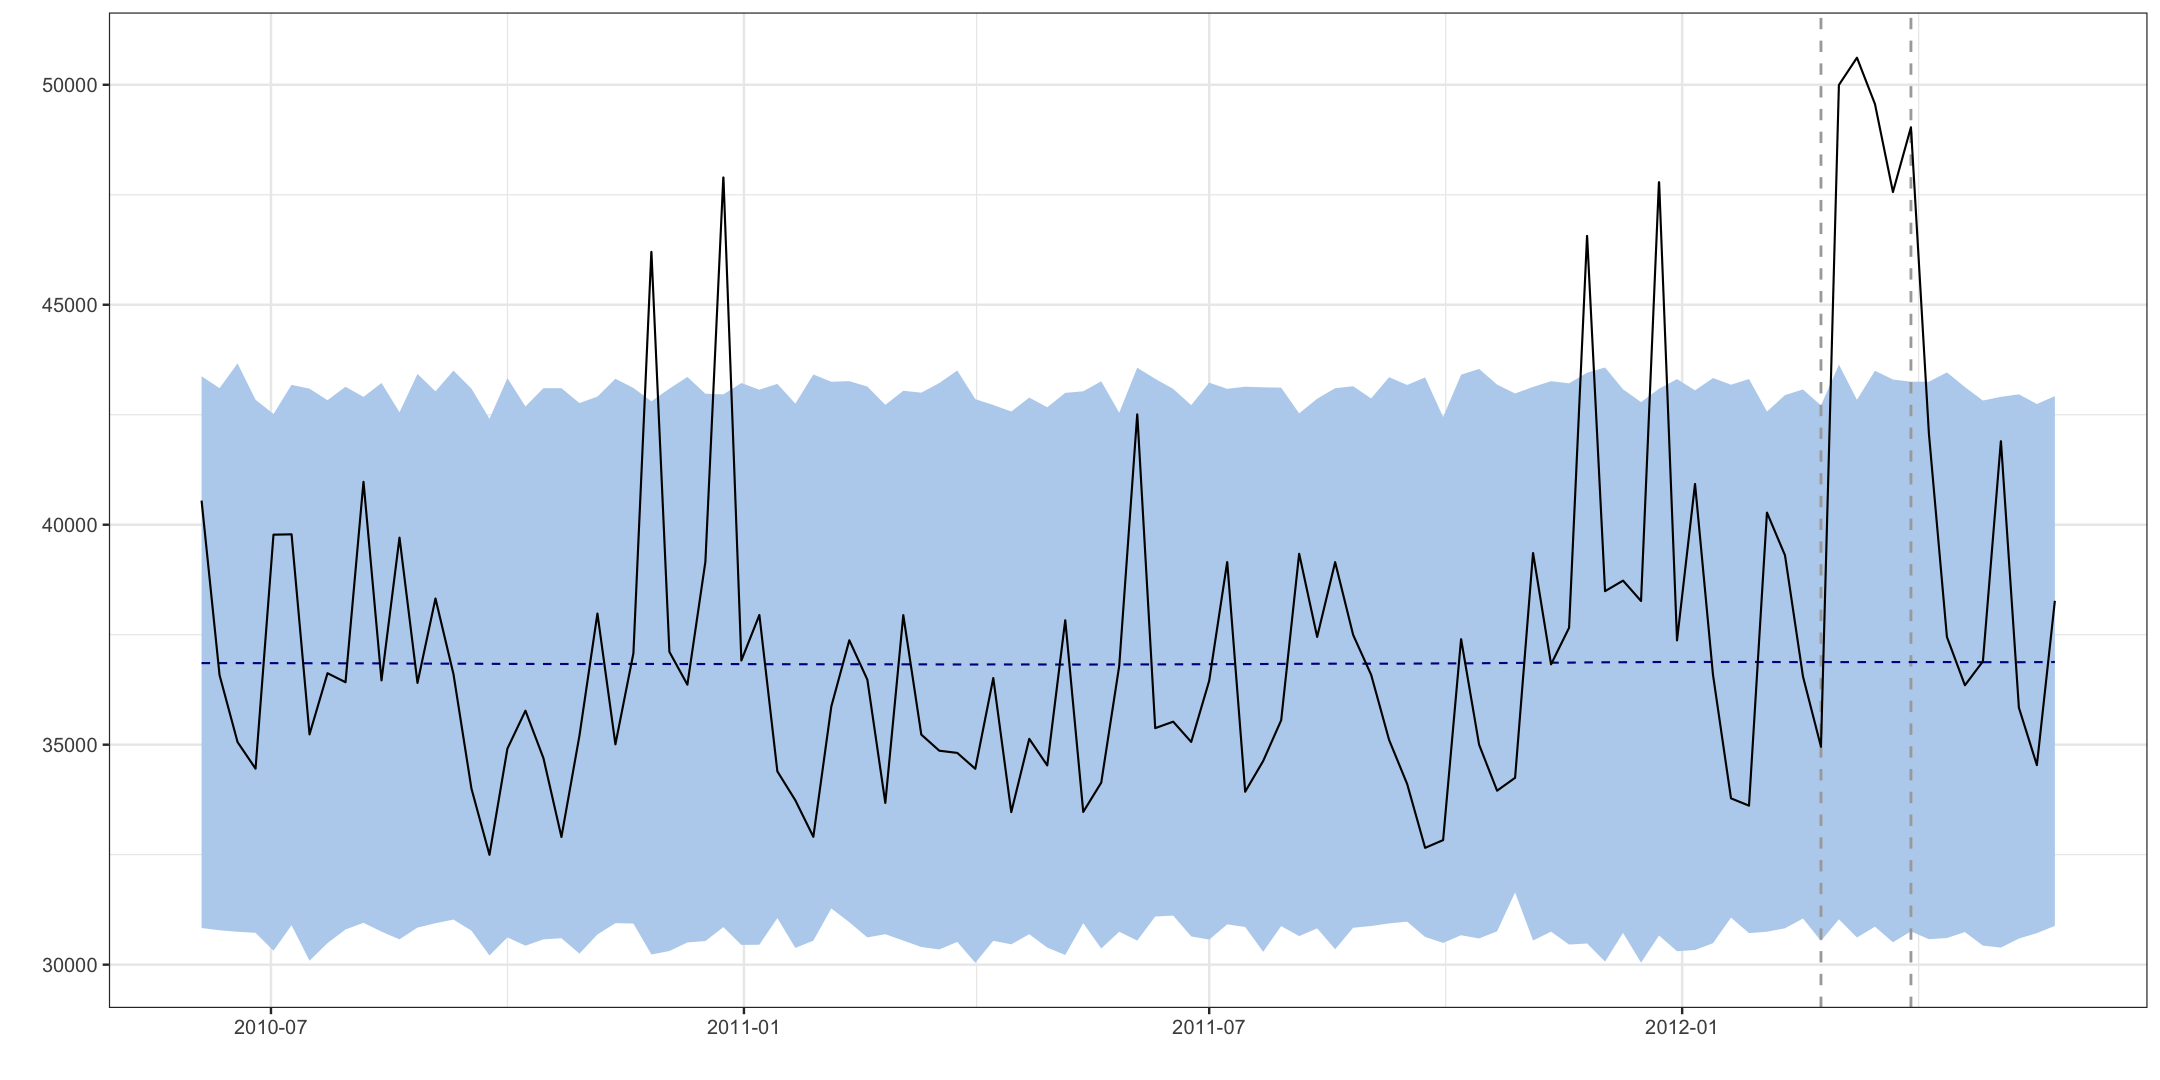

In [98]:
# 元の予測に対してどれだけリフトしているか
plot(impact, "original")

## #04. 季節性（seasonality）を取り入れた分析

In [100]:
seasonality <- list(niter=10000, nseasons=52, season.duration=1)
seasonality

$niter
[1] 10000

$nseasons
[1] 52

$season.duration
[1] 1

In [101]:
impact2 <- CausalImpact(marketing_xts$dept4,
                      pre.period = pre_period,
                      post.period = post_period,
                      model.args = seasonality)

Posterior inference {CausalImpact}

                         Average          Cumulative      
Actual                   49355            246773          
Prediction (s.d.)        35844 (691)      179220 (3453)   
95% CI                   [34479, 37181]   [172396, 185903]
                                                          
Absolute effect (s.d.)   13511 (691)      67553 (3453)    
95% CI                   [12174, 14875]   [60869, 74377]  
                                                          
Relative effect (s.d.)   38% (1.9%)       38% (1.9%)      
95% CI                   [34%, 42%]       [34%, 42%]      

Posterior tail-area probability p:   1e-04
Posterior prob. of a causal effect:  99.98999%

For more details, type: summary(impact, "report")



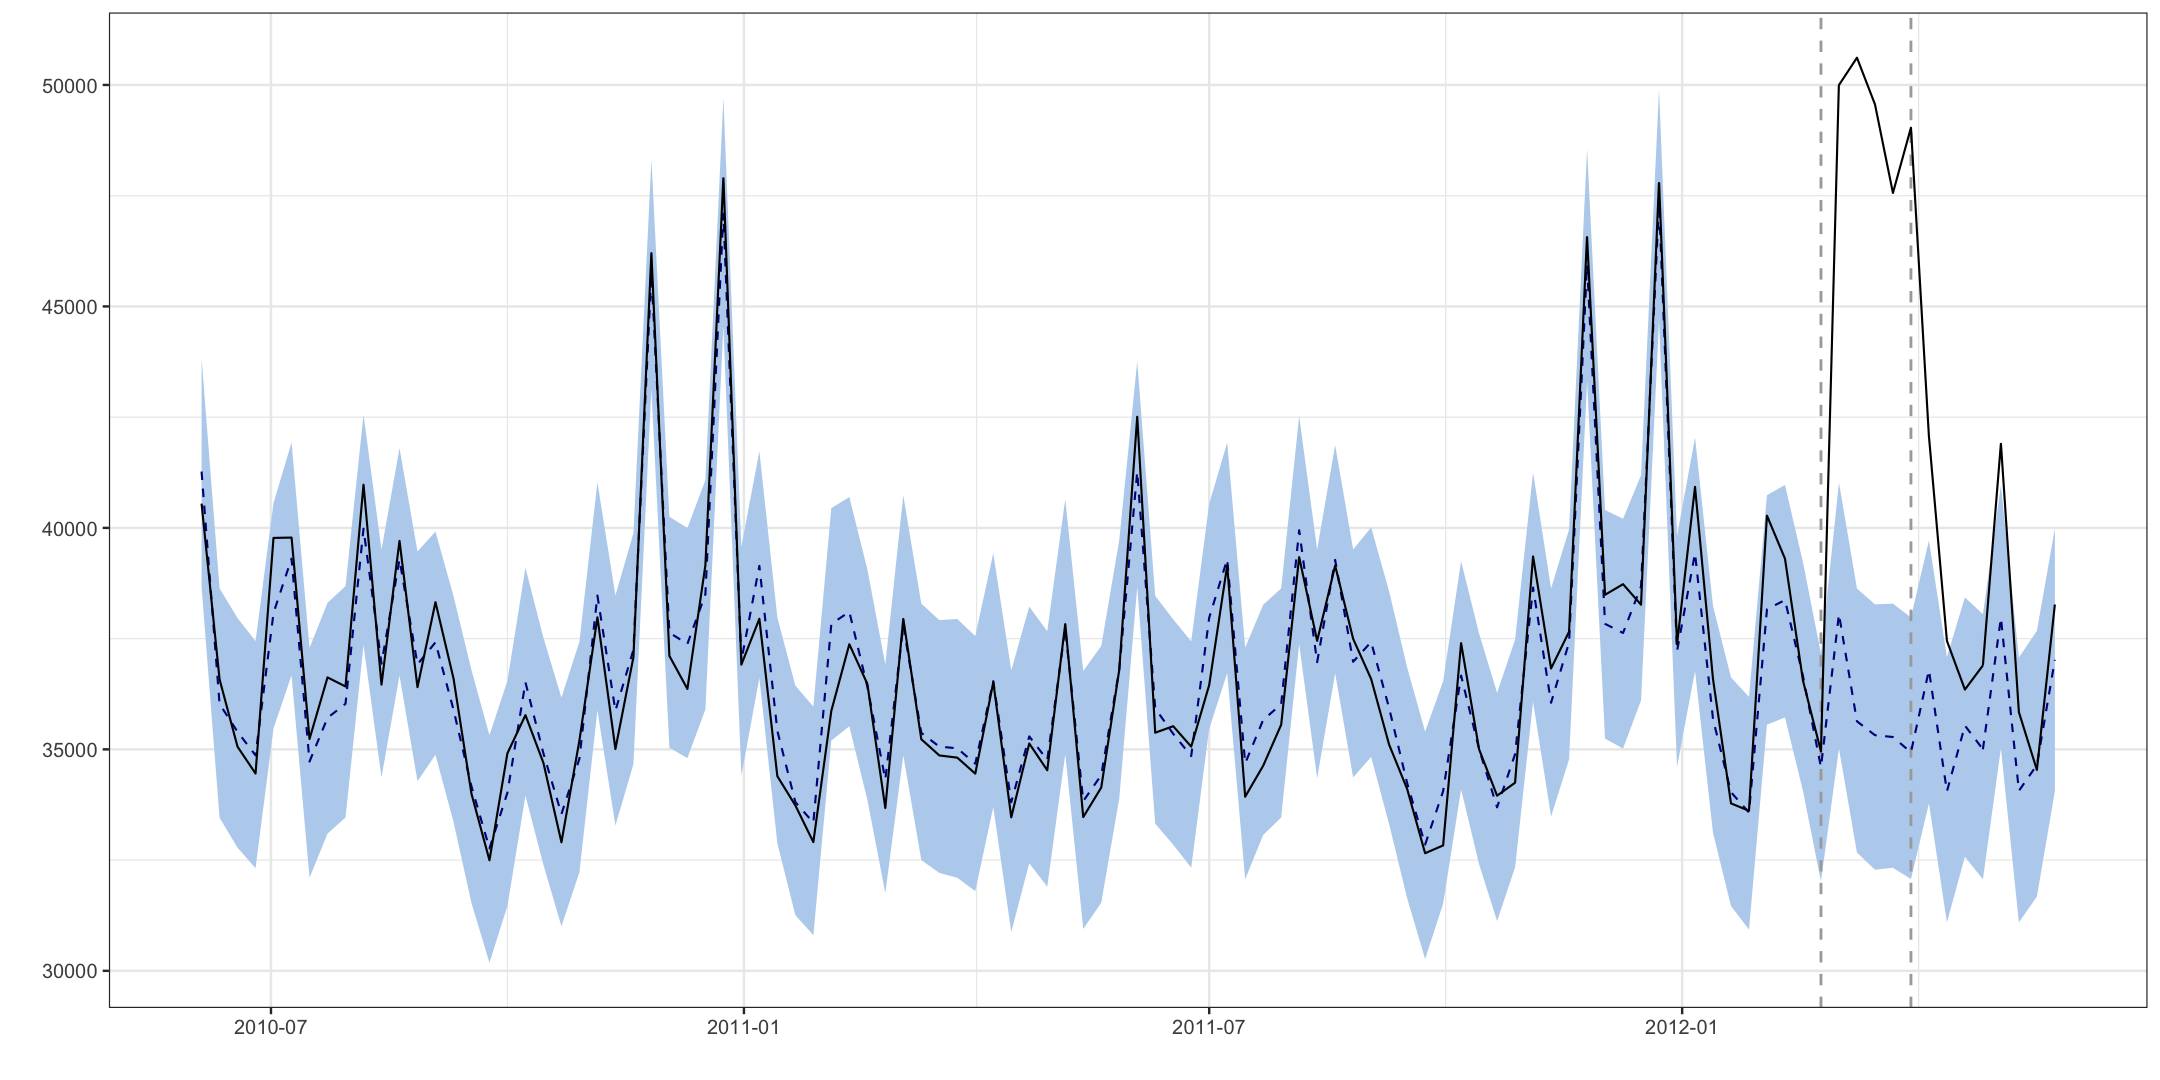

In [103]:
summary(impact2)
plot(impact2, "original")